# Demo2: Simple Harmonic Oscillator with RK2/RK4

In this jupyter notebook, we will learn how to use the Runge-Kutta 2/4 methods to solve for the motions of a simple harmonic oscillaotr.

&copy; Kuo-Chuan Pan, 2024\
For the course "Computational Physics" at NTHU

### Governing equations

The governing equations are 
$$
a^{t^n} = - \omega_0^2 x^{t^n},
$$

$$
\frac{dx}{dt} = v,
$$
and 
$$
\frac{dv}{dt} = a.
$$


### Runge-Jutta methods

Higher-order explicit schemes.

* RK2

$$
y_{k+1} = y_k + \frac{h_k}{2}(k_1 + k2),
$$
where $k_1 = f(t_k, y_k)$ and $k_2 = f(t_k+h_k, y_k + h_k k1)$.

* RK4

$$
y_{k+1} = y_k + \frac{h_k}{6}(k_1 +2k_2 +2k_3+k_4),
$$
where $k_1= f(t_k,y_k)$, $k_2=f(t_k+h_k/2, y_k + (h_k/2)k_1)$,
$k_3=f(t_k+h_k/2, y_k + (h_k/2)k_2)$, and $k_4=f(t_k+h_k, y_k+h_k k3)$.


### Initial Conditions

At time $t=0$, position $x=1$ and velocity $v=0$.\
Set $A=k=m=1$, and $\omega_0=\sqrt{k/m}=1$ as well.

## Exercie 1: Redo demo1 with the RK2 method
Use a small time step $\Delta t=0.01$ and solve for the solution at $t=20$.

In [7]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Euler's method

def solve_shm_euler(y, dt=0.01, tmax=20, A=1, k=1, m=1):
    omega0 = np.sqrt(k/m)
    times = np.linspace(0,tmax,int(tmax/dt)+1,endpoint=True)
    positions = np.zeros(len(times))
    velocities = np.zeros(len(times))    

    # set the initial conditions
    positions[0] = y[0]
    velocities[0] = y[1]

    # solve the difference equation using the Euler method
    for n in np.arange(1, len(times)):
        
        def f(y):
            return np.array([y[1], -omega0**2 * y[0]])
        y = y + dt*f(y) # Euler method

        # store the solution
        positions[n] = y[0]
        velocities[n] = y[1]

    return times, positions, velocities


In [9]:
# RK 2


def solve_shm_rk2(y, dt=0.01, tmax=20, A=1, k=1, m=1):
    omega0 = np.sqrt(k/m)
    times = np.linspace(0,tmax,int(tmax/dt)+1,endpoint=True)
    positions = np.zeros(len(times))
    velocities = np.zeros(len(times))    

    # set the initial conditions
    positions[0] = y[0]
    velocities[0] = y[1]

    # solve the difference equation using the Euler method
    for n in np.arange(1, len(times)):
        
        def f(t,y):
            return np.array([y[1], -omega0**2 * y[0]])
        
        t = times[n]
        #y = y + dt*f(t,y) # Euler method
        k1 = f(t,y)
        k2 = f(t+dt, y + dt*k1)
        y = y + dt/2*(k1+k2) # RK2

        # store the solution
        positions[n] = y[0]
        velocities[n] = y[1]

    return times, positions, velocities

    




In [13]:
t_euler, posx_euler, velx_euler = solve_shm_euler([1,0], dt=0.01, tmax=20, A=1, k=1, m=1)
t_rk2, posx_rk2, velx_rk2 = solve_shm_rk2([1,0], dt=0.01, tmax=20, A=1, k=1, m=1)

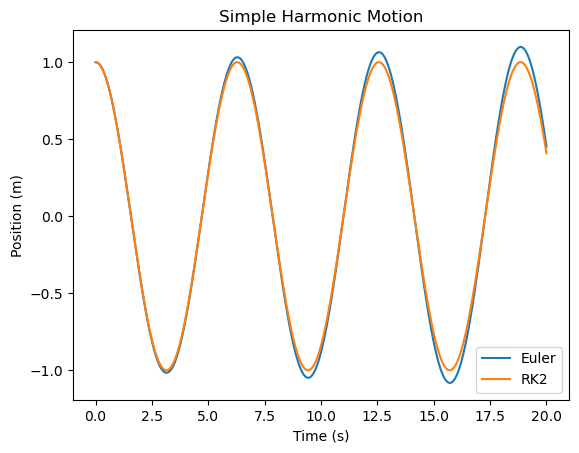

In [15]:
# Step 5: plot the solution
plt.plot(t_euler,posx_euler, label='Euler')
plt.plot(t_rk2,posx_rk2, label='RK2')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion')
plt.legend()
plt.show()

We could verify our numerical solution be comparing it with the analytical solutions.
The analytical solutions are:

$$
x = A \cos(\omega_0 t + \phi),
$$
and

$$
v = -A \omega_0 \sin(\omega_0 t + \delta).

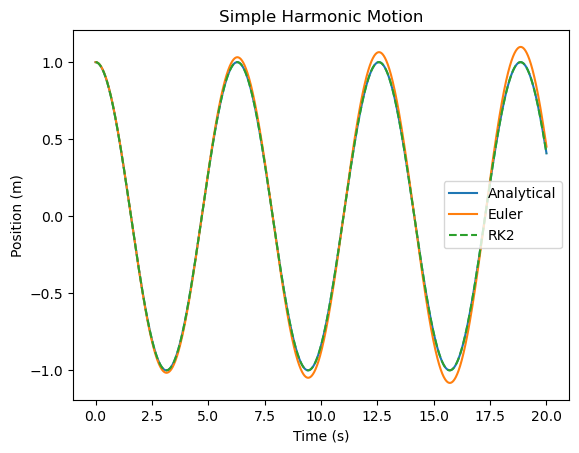

In [17]:
# Step 6: evaluate the analytical solution

omega0 = np.sqrt(1/1)
posx_ana =  np.cos(omega0*t_euler)
velx_ana = -np.sin(omega0*t_euler)

plt.plot(t_euler,posx_ana, label='Analytical')
plt.plot(t_euler,posx_euler, label='Euler')
plt.plot(t_rk2,posx_rk2,'--', label='RK2')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Simple Harmonic Motion') 
plt.legend()




Another way to chekc the accuray of our numerical solution is to check the energy conservation and the phase-sapce diagram.

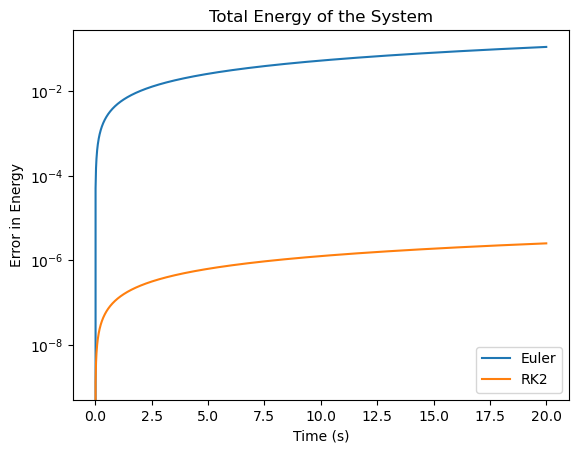

In [20]:
# Step 7: evaluate the energy (error) of the system

# TODO:
etot_euler = 0.5*1*velx_euler**2 + 0.5*1*posx_euler**2
etot_rk2   = 0.5*1*velx_rk2**2 + 0.5*1*posx_rk2**2

err_euler = np.abs(etot_euler - etot_euler[0])
err_rk2 = np.abs(etot_rk2 - etot_rk2[0])

plt.figure()
plt.plot(t_euler,err_euler, label='Euler')
plt.plot(t_rk2,err_rk2, label='RK2')
plt.xlabel('Time (s)')
plt.ylabel('Error in Energy')
plt.legend()
plt.yscale('log')
plt.title('Total Energy of the System')
plt.show()




In [ ]:
# Step 8: evaluate the phase space

# TODO:






## Exercise 2: Repeat with RK4


In [21]:
def solve_shm_rk4(y, dt=0.01, tmax=20, A=1, k=1, m=1):
    omega0 = np.sqrt(k/m)
    times = np.linspace(0,tmax,int(tmax/dt)+1,endpoint=True)
    positions = np.zeros(len(times))
    velocities = np.zeros(len(times))    

    # set the initial conditions
    positions[0] = y[0]
    velocities[0] = y[1]

    # solve the difference equation using the Euler method
    for n in np.arange(1, len(times)):
        
        def f(y):
            return np.array([y[1], -omega0**2 * y[0]])
        
        #t = times[n]
        #y = y + dt*f(t,y) # Euler method
        #k1 = f(y)
        #k2 = f(y + dt*k1)
        #y = y + dt/2*(k1+k2) # RK2

        k1 = f(y)
        k2 = f(y + dt/2*k1)
        k3 = f(y + dt/2*k2)
        k4 = f(y + dt*k3)
        y = y + dt/6*(k1+2*k2+2*k3+k4) # RK4

        # store the solution
        positions[n] = y[0]
        velocities[n] = y[1]

    return times, positions, velocities









In [22]:
t_euler, posx_euler, velx_euler = solve_shm_euler([1,0], dt=0.01, tmax=20, A=1, k=1, m=1)
t_rk2, posx_rk2, velx_rk2 = solve_shm_rk2([1,0], dt=0.01, tmax=20, A=1, k=1, m=1)
t_rk4, posx_rk4, velx_rk4 = solve_shm_rk4([1,0], dt=0.01, tmax=20, A=1, k=1, m=1)

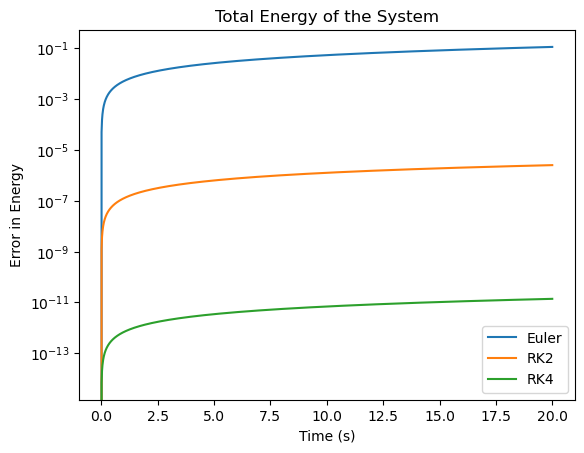

In [23]:
etot_euler = 0.5*1*velx_euler**2 + 0.5*1*posx_euler**2
etot_rk2   = 0.5*1*velx_rk2**2 + 0.5*1*posx_rk2**2
etot_rk4   = 0.5*1*velx_rk4**2 + 0.5*1*posx_rk4**2

err_euler = np.abs(etot_euler - etot_euler[0])
err_rk2 = np.abs(etot_rk2 - etot_rk2[0])
err_rk4 = np.abs(etot_rk4 - etot_rk4[0])

plt.figure()
plt.plot(t_euler,err_euler, label='Euler')
plt.plot(t_rk2,err_rk2, label='RK2')
plt.plot(t_rk4,err_rk4, label='RK4')
plt.xlabel('Time (s)')
plt.ylabel('Error in Energy')
plt.legend()
plt.yscale('log')
plt.title('Total Energy of the System')
plt.show()

In [28]:
def convergence(dts, method="Euler"):
    """
    Parameters:
    dts: an numpy array of time steps to use
    method: a string specifying the method to use. Default is "Euler"
    
    Return:
    errs: an numpy array of errors for each time step
    """
    errs = np.zeros(len(dts))
    for i,dt in enumerate(dts):
        if method == "Euler":
            t, x, v = solve_shm_euler([1,0], dt=dt, tmax=20, A=1, k=1, m=1)
        elif method == "RK2":
            t, x, v = solve_shm_rk2([1,0], dt=dt, tmax=20, A=1, k=1, m=1)
        elif method == "RK4":
            t, x, v = solve_shm_rk4([1,0], dt=dt, tmax=20, A=1, k=1, m=1)
        else:
            raise ValueError("Invalid method")
        etot = 0.5*1*v**2 + 0.5*1*x**2
        errs[i] = np.abs(etot[-1] - etot[0])

    return errs

In [31]:
dts = np.logspace(-6, -1, 8)
errs_euler = convergence(dts, method="Euler")
errs_rk2 = convergence(dts, method="RK2")
errs_rk4 = convergence(dts, method="RK4")

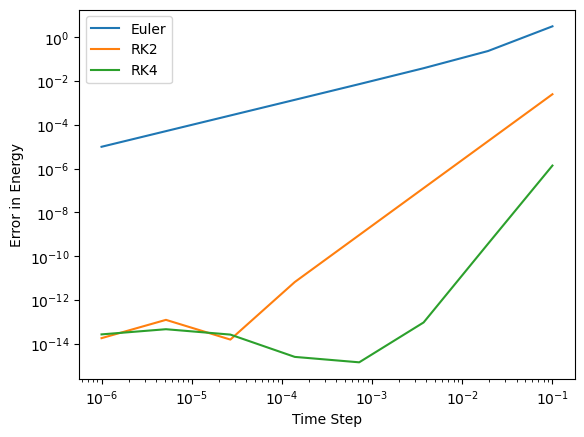

In [32]:
plt.figure()
plt.plot(dts,errs_euler, label='Euler')
plt.plot(dts,errs_rk2, label='RK2')
plt.plot(dts,errs_rk4, label='RK4')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time Step')
plt.ylabel('Error in Energy')
plt.legend()